In [52]:
import matplotlib.pyplot as plt
import qiskit as qk

from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector


# load IBMQ account
IBMQ.load_account()

/home/xerta/.anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [53]:
def teleportation_routine(circuit, qubits=[0,1,2], cbits=[0,1,2]):
    circuit.h(qubits[1])
    circuit.cx(qubits[1], qubits[2])
    circuit.cx(qubits[0], qubits[1])
    circuit.h(qubits[0])

    circuit.barrier()

    circuit.measure([qubits[0],qubits[1]], [cbits[0],cbits[1]])

    circuit.barrier()

    circuit.cx(qubits[1],qubits[2])
    circuit.cz(qubits[0],qubits[2])
    
    return circuit

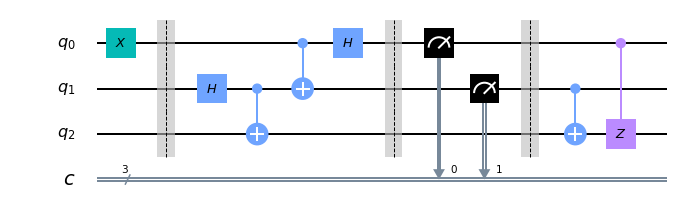

In [58]:
circuit = qk.QuantumCircuit(3, 3)  # create circuit with 3 qubits and 3 bits.

# initialize state to be teleported
circuit.x(0)
circuit.barrier()

# add teleportation to our circuit
teleportation_routine(circuit)

# show circuit
circuit.draw(output='mpl')

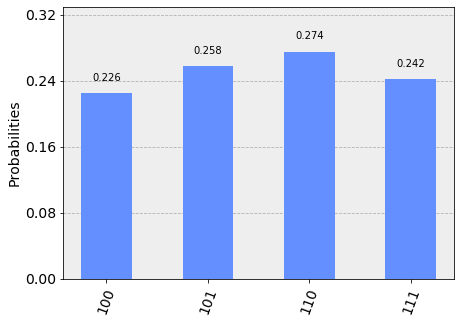

In [57]:
circuit.measure(2,2)

# show results
simulator = qk.Aer.get_backend('qasm_simulator')
result = qk.execute(circuit, backend=simulator, shots=1024).result()
plot_histogram(result.get_counts())